# Regression Case - Boston housing 2

 Part of this notebook was adapted from the courses [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook/tree/master)  and [Gradient Descent in Python](https://gist.github.com/sagarmainkar/41d135a04d7d3bc4098f0664fe20cf3c)

In [68]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import statsmodels.api as sm

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split

## Importing the data

In [69]:
data_boston = "data/boston.txt"
raw_df = pd.read_csv(data_boston, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [70]:
df_boston=pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'])
df_boston.drop(columns=['B'], inplace=True)
# Add log LSTAT
log_LSTAT=np.log(df_boston['LSTAT'])
df_boston['log_LSTAT']=log_LSTAT

target_df=pd.DataFrame(target, columns=['target'])
df_boston.sample(5)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,log_LSTAT
428,7.36711,0.0,18.10,0.0,0.679,6.193,78.1,1.9356,24.0,666.0,20.2,21.52,3.068983
326,0.30347,0.0,7.38,0.0,0.493,6.312,28.9,5.4159,5.0,287.0,19.6,6.15,1.816452
40,0.03359,75.0,2.95,0.0,0.428,7.024,15.8,5.4011,3.0,252.0,18.3,1.98,0.683097
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,6.58,1.884035
201,0.03445,82.5,2.03,0.0,0.415,6.162,38.4,6.2700,2.0,348.0,14.7,7.43,2.005526


In [71]:
# Separate features and target variables
X = df_boston.drop(columns=['LSTAT']) 
y = target
columns = X.columns #column names

# Filter the unusual observation
X=X[y<50]
y=y[y<50]

### Train/test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=10)

### Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

## KNN Model

<div style="float: right; text-align:center; width: 60%">
<figure>
    <img src="figures/KnnClassification.svg" alt="KNN cassification"/>
</figure>
    <figure>
    <img src="figures/knn_reg.png" alt="KNN regression"/>
</figure>
</div>

The k-nearest neighbors (KNN) algorithm approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighbourhood. 

The size of the neighbourhood is an hyperparameter of the model. It is a non-parametric algorithm that doesn't make assumptions about the underlying data distribution.



**Main Parameters**

- `n_neighbors` : Number of neighbors.

- `weights` : Weight function used in prediction {'uniform', 'distance'}

- `p` : Power parameter for the Minkowski metric.

-  `metric` : Metric to use for distance computation. 


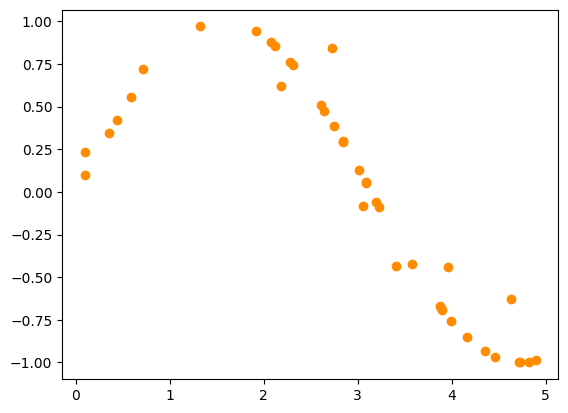

In [72]:
from sklearn import neighbors

np.random.seed(0)

X_sample = np.sort(5 * np.random.rand(40, 1), axis=0)
y_sample = np.sin(X_sample).ravel()

T = np.linspace(0, 5, 500)[:, np.newaxis]

# Add noise to targets
y_sample[::5] += 1 * (0.5 - np.random.rand(8))

plt.scatter(X_sample, y_sample, color="darkorange", label="data")

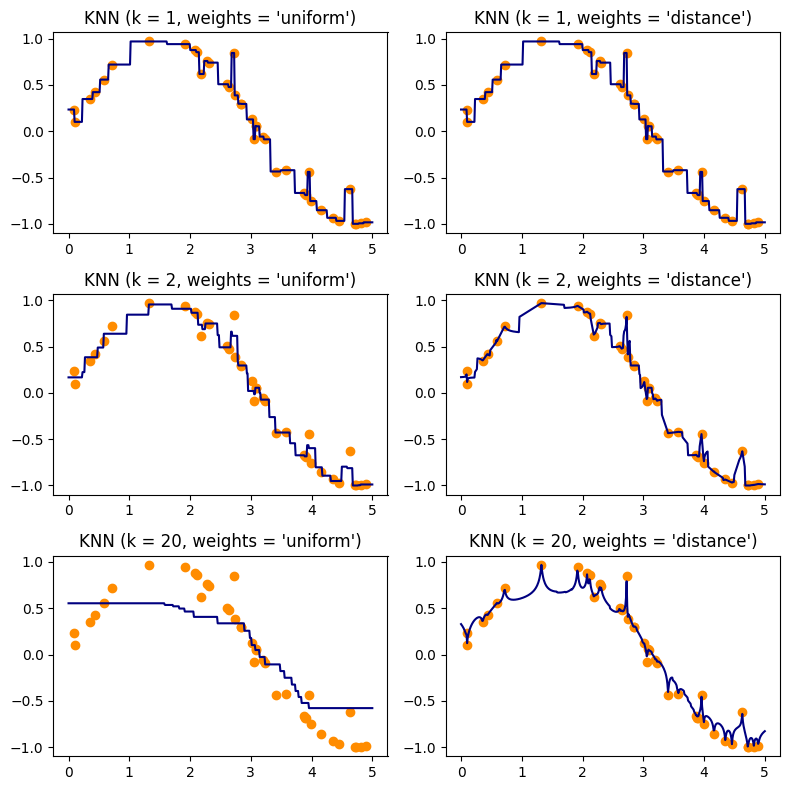

In [73]:
fig, axs = plt.subplots(3, 2, figsize=(8, 8))
n = 0

for n_neighbors in [1,2,20] :
    for i, weights in enumerate(["uniform", "distance"]):
        knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
        y_ = knn.fit(X_sample, y_sample).predict(T)

        axs[n//2,n%2].scatter(X_sample, y_sample, color="darkorange", label="data")
        axs[n//2,n%2].plot(T, y_, color="navy", label="prediction")
        axs[n//2,n%2].axis("tight")
        axs[n//2,n%2].set_title("KNN (k = %i, weights = '%s')" % (n_neighbors, weights))
        
        n=n+1
plt.tight_layout()
plt.show()

In [90]:
#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor()

# n_neighbors: Number of neighbors 
# weight: ‘uniform’ : uniform weights. ‘difigures/KnnClassification.pstance’ : weight points by the inverse of their distance.
# p Power parameter for the Minkowski metric.
# n_job:  number of parallel jobs to run (-1)


parameters = {'n_neighbors': np.arange(10, 20),
              'p': [1,2,3]}

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3, verbose = 0, scoring ='neg_mean_absolute_error')
#,https://scikit-learn.org/stable/modules/model_evaluation.html 
#'neg_mean_absolute_error',
#'neg_mean_squared_error'
# 'r2'
_ = gs.fit(X_train,y_train)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: -2.800600 using {'n_neighbors': 10, 'p': 1}
-2.800600 (0.052898) with: {'n_neighbors': 10, 'p': 1}
-2.938710 (0.096148) with: {'n_neighbors': 10, 'p': 2}
-3.072495 (0.124782) with: {'n_neighbors': 10, 'p': 3}
-2.842789 (0.010415) with: {'n_neighbors': 11, 'p': 1}
-2.967496 (0.117665) with: {'n_neighbors': 11, 'p': 2}
-3.123812 (0.112035) with: {'n_neighbors': 11, 'p': 3}
-2.885428 (0.018215) with: {'n_neighbors': 12, 'p': 1}
-2.954884 (0.107088) with: {'n_neighbors': 12, 'p': 2}
-3.120430 (0.134967) with: {'n_neighbors': 12, 'p': 3}
-2.902874 (0.025652) with: {'n_neighbors': 13, 'p': 1}
-2.967649 (0.101420) with: {'n_neighbors': 13, 'p': 2}
-3.148078 (0.137909) with: {'n_neighbors': 13, 'p': 3}
-2.909103 (0.058939) with: {'n_neighbors': 14, 'p': 1}
-2.978087 (0.104773) with: {'n_neighbors': 14, 'p': 2}
-3.156256 (0.138542) with: {'n_neighbors': 14, 'p': 3}
-2.932201 (0.070641) with: {'n_neighbors': 15, 'p': 1}
-3.011919 (0.133580) with: {'n_neighbor

-2.593061224489796

In [91]:
len(means)

30

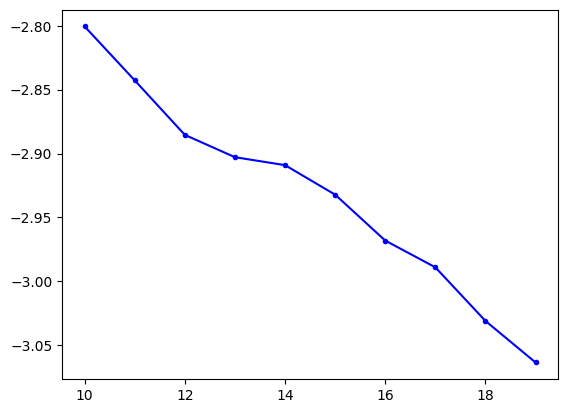

In [92]:
plt.plot(np.arange(10, 20), means[::3], color='b', marker='.', linestyle='solid')
plt.show()

In [93]:
print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("")
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("")
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("")
print("r2 train: ",metrics.r2_score(y_train, gs.predict(X_train)))
print("r2 test: ",metrics.r2_score(y_test, gs.predict(X_test)))

MAE train:  2.397930029154519
MAE test:  2.593061224489796

MSE train:  10.873821282798835
MSE test:  14.030296598639458

RMSE train:  3.2975477680844647
RMSE test:  3.745703752119147

r2 train:  0.8201175220878207
r2 test:  0.7826632196424179


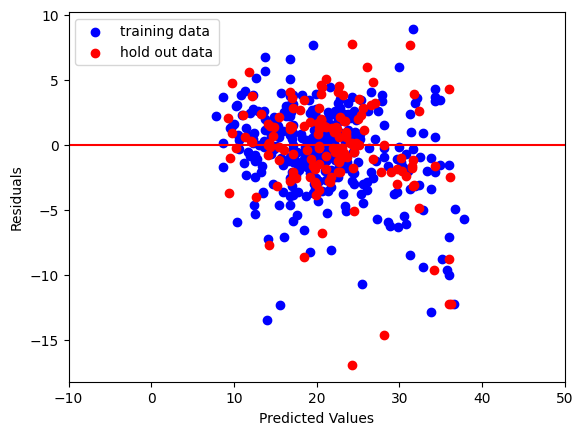

In [94]:
plt.scatter(gs.predict(X_train),gs.predict(X_train)-y_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),gs.predict(X_test)-y_test, c="r", label="hold out data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

## Regression Tree

<div style="float: right; text-align:center; width: 60%">
<figure>
    <img src="figures/reg_tree_0.png" alt="Regression Tree"/>
</figure>
</div>

Tree-based methods attemps to recursevily partition the feature space into a set of rectangles.
The partitions are generated in such a way that the observation in each rectangle are *similar* between them.    
Then, a simple fit is made in each rectangle: a constant value (usually a weighted the mean). 
They simple and powerful and overall easy to interpretate


**Procedure**
The method works in a greedy manner. Starting with all of the data, it consider a splitting variable $j$ and split value $s$, and partition the data stace aaacording to the following half-planes
$$
R_1(j, s)=\left\{X \mid X_j \leq s\right\} \quad \text { and }\quad  R_2(j, s)=\left\{X \mid X_j>s\right\} .
$$

Then we seek the splitting variable $j$ and split point $s$ that minimize the a homogeneity criterion. For instance the sum of the residuals squares: 
$$
\min _{j, s}\left[\min _{c_1} \sum_{x_i \in R_1(j, s)}\left(y_i-c_1\right)^2+\min _{c_2} \sum_{x_i \in R_2(j, s)}\left(y_i-c_2\right)^2\right] .
$$

Where 
$$
\hat{c}_1=\operatorname{mean}\left(y_i \mid x_i \in R_1(j, s)\right) \quad \text { and } \quad \hat{c}_2=\operatorname{mean}\left(y_i \mid x_i \in R_2(j, s)\right) .
$$

We proceed in a recursive way by splitting each of the two sub-regions. The process is repeated until a stop criterion reached; for example the size of the resulting groups of observations or the decrease in sum-of-squares due to the
split do not exceeds some threshold.

**Pruning**

An alternative to simplify the final tree is to construct a large tree $T_0$ which is pruned using cost-complexity pruning.
For the pruning we define a subtree $T \subset T_0$ obtained by collapsing into a single node some of its terminal nodes $R_m$.
The pruning criterion is made by minimizing the following function:
$$
C_\alpha(T)=\sum_{m=1}^{|T|} N_m Q_m(T)+\alpha|T| .
$$
 where 
$$
\begin{aligned}
N_m & =\#\left\{x_i \in R_m\right\}, \\
\hat{c}_m & =\frac{1}{N_m} \sum_{x_i \in R_m} y_i, \\
Q_m(T) & =\frac{1}{N_m} \sum_{x_i \in R_m}\left(y_i-\hat{c}_m\right)^2,
\end{aligned}
$$

Notice that large values of $\alpha$ result in smaller trees since the leading term in the optimization is the size of the tree $|T|$, while smaller values generate bigger trees since we give more weight to the error. 

**Main Parameters**

- `criterion` : The function to measure the quality of a split.
  {"squared_error", "friedman_mse", "absolute_error", "poisson"}
     
- `max_depth` : The maximum depth of the tree. 

- `min_samples_split` : The minimum number of samples required to split an internal node.

- `min_samples_leaf` : The minimum number of samples required to be at a leaf node.

- `max_features` : The number of features to consider when looking for the best split.

- `ccp_alpha` : Complexity parameter used for Minimal Cost-Complexity Pruning.

<table><tr>
<td> <img src="figures/reg_tree_1.png" alt="KNN underfitting" style="width: 350px;"/>
    <figcaption><small>Domain partition</small></figcaption>  </td>
<td> <img src="figures/reg_tree_2.png" alt="Medi" style="width: 350px;"/>
    <figcaption><small>Tree</small></figcaption>  </td>
<td> <img src="figures/reg_tree_3.png" alt="Lasso Regression" style="width: 350px;"/>
    <figcaption><small>Function approximation</small></figcaption>  </td>
</tr></table>

In [95]:
#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.tree import DecisionTreeRegressor 

regressor = DecisionTreeRegressor()
parameters = {"max_depth": range(3,10), 
              "min_samples_leaf": [10,20,30],
               "min_samples_split": [10,20,30]
             }

#DEFINE YOUR GRIDSEARCH 
gs = GridSearchCV(regressor, parameters, cv=3, scoring ='neg_mean_absolute_error') 
gs = gs.fit(X_train,y_train)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: -2.871930 using {'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 10}
-3.153201 (0.058948) with: {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 10}
-3.153201 (0.058948) with: {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 20}
-3.180126 (0.079859) with: {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 30}
-3.238127 (0.169470) with: {'max_depth': 3, 'min_samples_leaf': 20, 'min_samples_split': 10}
-3.238127 (0.169470) with: {'max_depth': 3, 'min_samples_leaf': 20, 'min_samples_split': 20}
-3.238127 (0.169470) with: {'max_depth': 3, 'min_samples_leaf': 20, 'min_samples_split': 30}
-3.352201 (0.122756) with: {'max_depth': 3, 'min_samples_leaf': 30, 'min_samples_split': 10}
-3.352201 (0.122756) with: {'max_depth': 3, 'min_samples_leaf': 30, 'min_samples_split': 20}
-3.352201 (0.122756) with: {'max_depth': 3, 'min_samples_leaf': 30, 'min_samples_split': 30}
-2.871930 (0.074671) with: {'max_depth': 4, 

-2.2448632471346395

In [96]:
print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("")
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("")
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("")
print("r2 train: ",metrics.r2_score(y_train, gs.predict(X_train)))
print("r2 test: ",metrics.r2_score(y_test, gs.predict(X_test)))

MAE train:  2.180060810869465
MAE test:  2.2448632471346395

MSE train:  9.269589326116119
MSE test:  8.634027654259462

RMSE train:  3.0446000272804503
RMSE test:  2.938371599076513

r2 train:  0.846655866981394
r2 test:  0.8662543048393543


In [97]:
error_train=gs.predict(X_train)-y_train
error_test=gs.predict(X_test)-y_test

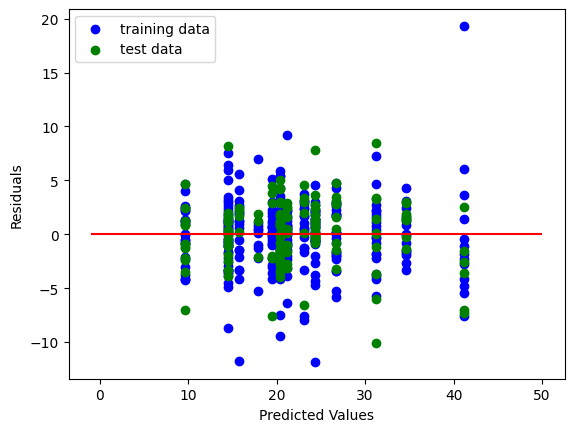

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(gs.predict(X_train),error_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),error_test, c="g", label="test data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-1, xmax=50, color="r")
plt.show()

In [99]:
from sklearn import tree
r = tree.export_text(gs.best_estimator_,feature_names=columns.tolist(), max_depth=2)
print(r)

|--- log_LSTAT <= -0.23
|   |--- RM <= 1.31
|   |   |--- RM <= 0.49
|   |   |   |--- truncated branch of depth 2
|   |   |--- RM >  0.49
|   |   |   |--- truncated branch of depth 2
|   |--- RM >  1.31
|   |   |--- RM <= 1.84
|   |   |   |--- value: [34.62]
|   |   |--- RM >  1.84
|   |   |   |--- value: [41.23]
|--- log_LSTAT >  -0.23
|   |--- log_LSTAT <= 0.47
|   |   |--- TAX <= -0.77
|   |   |   |--- value: [23.08]
|   |   |--- TAX >  -0.77
|   |   |   |--- truncated branch of depth 2
|   |--- log_LSTAT >  0.47
|   |   |--- NOX <= 0.39
|   |   |   |--- truncated branch of depth 2
|   |   |--- NOX >  0.39
|   |   |   |--- truncated branch of depth 2



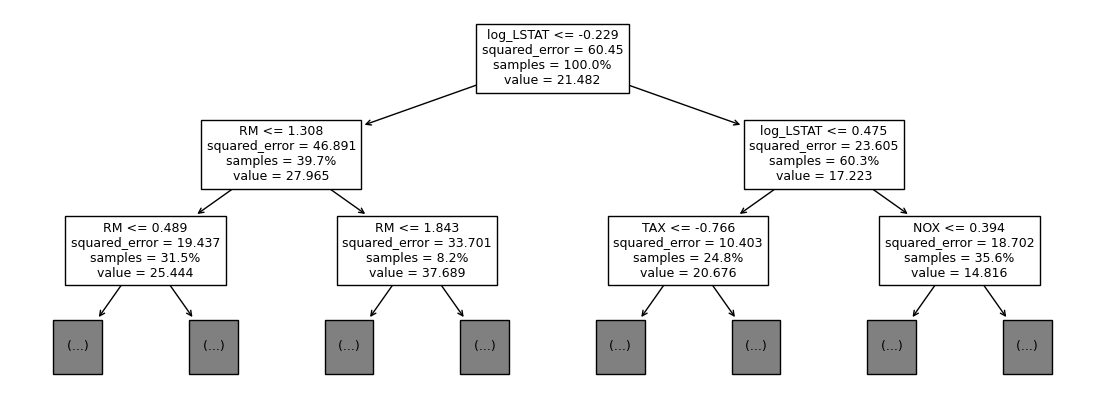

In [100]:
plt.figure(figsize=(14,5))
tree.plot_tree(gs.best_estimator_,  max_depth=2, feature_names=columns.tolist(),fontsize=9,proportion=True)
plt.show()

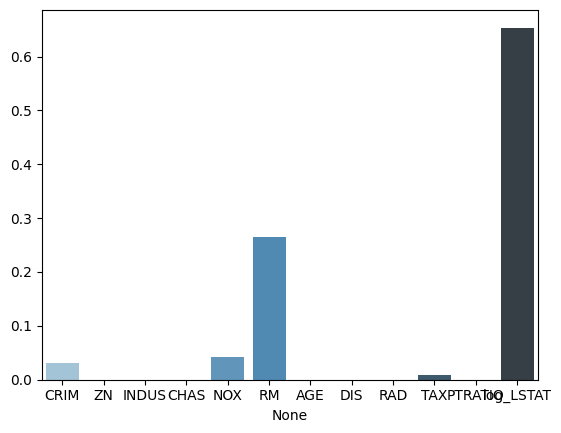

In [101]:
_=sns.barplot(x=columns, y=gs.best_estimator_.feature_importances_, hue=columns,palette="Blues_d")

## Support Vector Regression

Support vector machine (SVM) analysis is a machine learning algorithm used for regression and classification.
It was mainly developed by Vladimir Vapnik around 1992 and it is based on the construction of an optimization problem to create a linear approximation of the data. In the case of non-linear function, the method use a kernel function transformation technique to perform the approximation. Thus is considered a nonparametric technique.

<div style="float: right; text-align:center; width: 50%">
<figure>
    <img src="figures/svr.png" alt="SVR"/>
</figure>
<figure>
    <img src="figures/kernel.png" alt="Example of the kernel use"/>
</figure>
</div>

$$\begin{align}
\min_{w, b, \zeta, \zeta^*} \quad & \frac{1}{2} \|w\| + C \sum_{i=1}^{n} (\zeta_i + \zeta_i^*)\\
\textrm {subject to } \quad & y_i - w^T \phi (x_i) - b \leq \varepsilon + \zeta_i\quad \text{(upper error)}\\
                      & w^T \phi (x_i) + b - y_i \leq \varepsilon + \zeta_i^* \quad \text{(lower error)}\\
                      & \zeta_i, \zeta_i^* \geq 0 \quad  i=1,\ldots,n
\end{align}$$

**Main Parameters**
- $C$: inverse of regularization strength
- $\varepsilon$: tolerance
- kernel:  $\phi$ is the kernel map that can be chosen as 
    - linear: $\langle x, x'\rangle$
    - poly: $(\gamma \langle x, x'\rangle + r)^d$ where $\gamma,\, d ,\, r$ are specified by keyword gamma, degree and coef0 respectively.
    - rbf - radial basis function: $\exp(-\gamma \|x-x'\|^2)$
    - neural networks (sigmoid): $\tanh(\gamma \langle x,x'\rangle + r)$
- Resolution algorithm parameters

**Note** There are three different implementations of Support Vector Regression: 
`SVR`, `NuSVR` and `LinearSVR`. 

LinearSVR provides a faster implementation than SVR but only considers linear kernels, 
while NuSVR implements a slightly different formulation than SVR and LinearSVR. See Implementation details for further details.

In [102]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=2, epsilon=0.1, coef0=1)

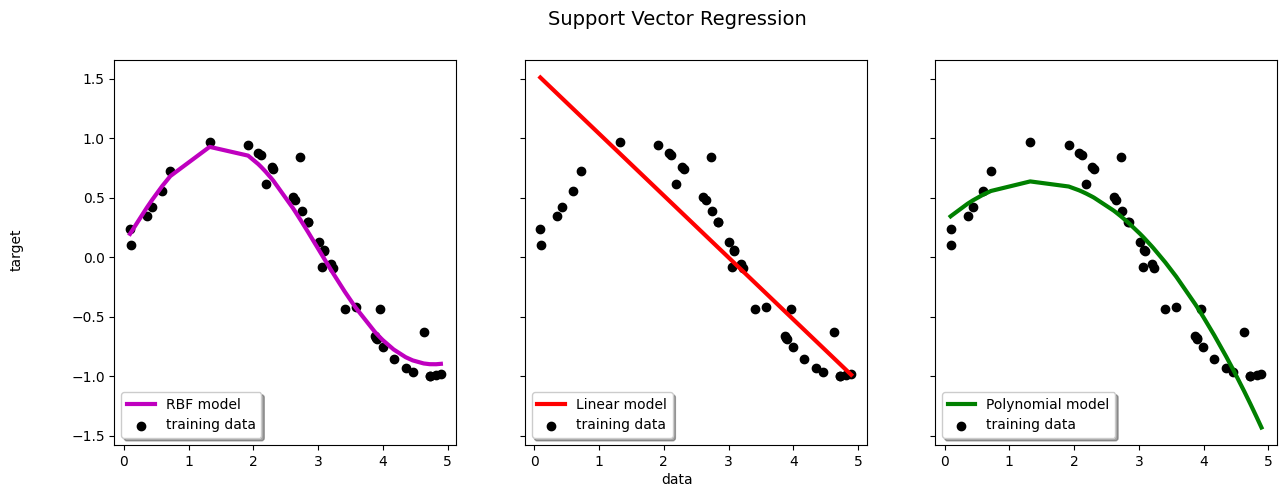

In [103]:
svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "r", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X_sample,
        svr.fit(X_sample, y_sample).predict(X_sample),
        color=model_color[ix],
        lw=3,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X_sample,
        y_sample,
        color="k",
        label="training data",
    )
    axes[ix].legend(
        loc="lower left",
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

In [104]:
#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
regressor = SVR()
parameters = {'C': [10],
             'epsilon': [0.01],
             'gamma':['auto'],
             'kernel': ['linear', 'poly','rbf'],
             'degree': [2,3,5]
             }

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3, verbose = 0,scoring ='neg_mean_absolute_error') #with no params it reduces to a CV

gs = gs.fit(X_train,y_train)

In [105]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: -2.230426 using {'C': 10, 'degree': 2, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}
-2.800508 (0.030794) with: {'C': 10, 'degree': 2, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'linear'}
-4.090412 (0.258660) with: {'C': 10, 'degree': 2, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'poly'}
-2.230426 (0.253991) with: {'C': 10, 'degree': 2, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}
-2.800508 (0.030794) with: {'C': 10, 'degree': 3, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'linear'}
-2.899580 (0.337649) with: {'C': 10, 'degree': 3, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'poly'}
-2.230426 (0.253991) with: {'C': 10, 'degree': 3, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}
-2.800508 (0.030794) with: {'C': 10, 'degree': 5, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'linear'}
-4.051720 (0.962493) with: {'C': 10, 'degree': 5, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'poly'}
-2.230426 (0.253991) with: {'C': 10, 'degree': 5, 'ep

-2.042713882225081

In [106]:
print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("")
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("")
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("")
print("r2 train: ",metrics.r2_score(y_train, gs.predict(X_train)))
print("r2 test: ",metrics.r2_score(y_test, gs.predict(X_test)))

MAE train:  1.475820994442658
MAE test:  2.042713882225081

MSE train:  5.624478834189095
MSE test:  7.8944945618206654

RMSE train:  2.371598371181152
RMSE test:  2.80971432032167

r2 train:  0.9069558747246466
r2 test:  0.8777100670285956


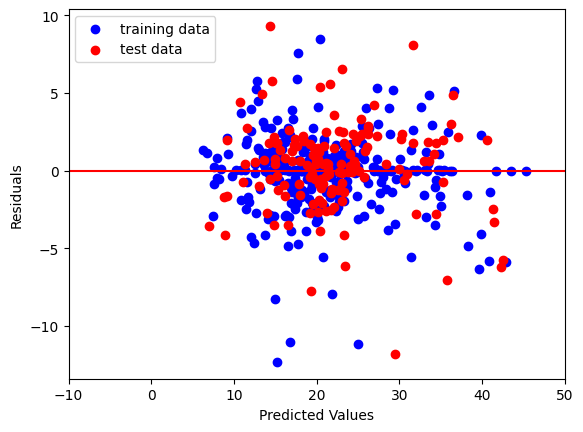

In [107]:
plt.scatter(gs.predict(X_train),gs.predict(X_train)-y_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),gs.predict(X_test)-y_test, c="r", label="test data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

## Multi-layer Perceptron Regression

The multi-layer perceptron (MLP), mostly known as **feedforward artificial neural network** is a type of neural network commonly used for supervised tasks. 
It consists of an input layer, one or more hidden layers, and an output layer. Each layer is composed of nodes or neurons that connect the neuronnd from the prvious layer to those in the next layer. 
In an MLP for regression, the output layer typically consists of a single neuron, which provides the predicted continuous output value.

Each neuron in the MLP receives inputs from the previous layer, applies an activation function to compute its output, and passes it as input to the neurons in the next layer. 
Typical activation functions used in regression MLPs include sigmoid, tanh, or ReLU.

During training phase, the weights and biases of the neurons are adjusted based on the difference between the predicted output and the true output; this adjustment is done using an optimization algorithm to minimize this difference.

<div style="float: left; text-align:center; width: 50%">
<figure>
    <img src="figures/neural_network.png" alt="Neural Network"/>
</figure>
    </div>
    <div style="float: right; text-align:center; width: 50%">
<figure>
    <img src="figures/neural_networks_2.png" alt="Neural Network weights"/>
</figure>
</div>




In [108]:
#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.neural_network import MLPRegressor
import numpy as np

regressor = MLPRegressor(random_state=0)
parameters = {'hidden_layer_sizes': [(8),(10, 5), (20,10,5), (10,5,3)],
              'solver' : ['sgd'],
              #'batch_size': [20],
              #'learning_rate' : ['constant'],
              'alpha':10.0 ** -np.arange(-1, 3),
              'max_iter':[10000]}

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3, verbose = 0) #with no params it reduces to a CV

gs = gs.fit(X_train,y_train)

In [109]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: 0.827458 using {'alpha': 10.0, 'hidden_layer_sizes': (20, 10, 5), 'max_iter': 10000, 'solver': 'sgd'}
0.811437 (0.036684) with: {'alpha': 10.0, 'hidden_layer_sizes': 8, 'max_iter': 10000, 'solver': 'sgd'}
0.815611 (0.043068) with: {'alpha': 10.0, 'hidden_layer_sizes': (10, 5), 'max_iter': 10000, 'solver': 'sgd'}
0.827458 (0.042099) with: {'alpha': 10.0, 'hidden_layer_sizes': (20, 10, 5), 'max_iter': 10000, 'solver': 'sgd'}
-0.006432 (0.004516) with: {'alpha': 10.0, 'hidden_layer_sizes': (10, 5, 3), 'max_iter': 10000, 'solver': 'sgd'}
0.820522 (0.033170) with: {'alpha': 1.0, 'hidden_layer_sizes': 8, 'max_iter': 10000, 'solver': 'sgd'}
0.808439 (0.058961) with: {'alpha': 1.0, 'hidden_layer_sizes': (10, 5), 'max_iter': 10000, 'solver': 'sgd'}
0.817336 (0.049841) with: {'alpha': 1.0, 'hidden_layer_sizes': (20, 10, 5), 'max_iter': 10000, 'solver': 'sgd'}
-0.006359 (0.005292) with: {'alpha': 1.0, 'hidden_layer_sizes': (10, 5, 3), 'max_iter': 10000, 'solve

0.902141278061404

In [110]:
print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("")
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("")
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("")
print("r2 train: ",metrics.r2_score(y_train, gs.predict(X_train)))
print("r2 test: ",metrics.r2_score(y_test, gs.predict(X_test)))

MAE train:  1.4620363040655184
MAE test:  1.912754865399424

MSE train:  3.96156800191934
MSE test:  6.317324160702694

RMSE train:  1.9903688105271695
RMSE test:  2.513428765790408

r2 train:  0.9344649272716914
r2 test:  0.902141278061404


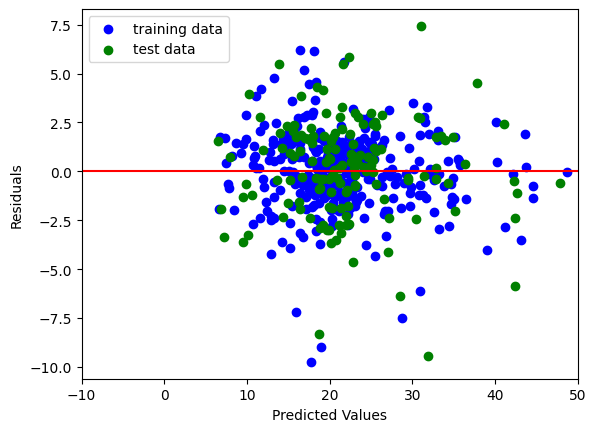

In [111]:
plt.scatter(gs.predict(X_train),gs.predict(X_train)-y_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),gs.predict(X_test)-y_test, c="g", label="test data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

In [113]:
error_train=gs.predict(X_train)-y_train
error_test=gs.predict(X_test)-y_test
nb_error_train = np.array(error_train).flatten()

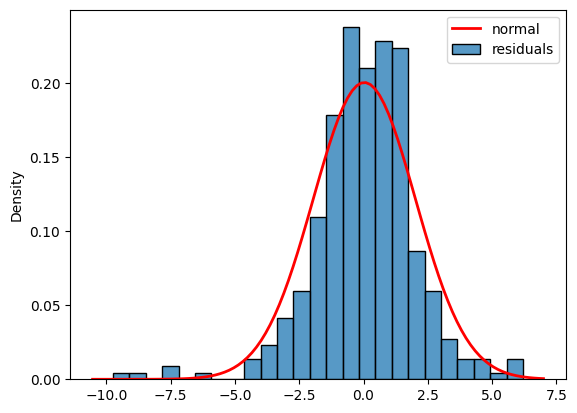

In [114]:
# We test a exponential distribution
dist = getattr(scipy.stats, 'norm')
param = dist.fit(nb_error_train)

err_mean=param[-2]
err_std=param[-1]

# We generate a sample of size  len(mr_scaled) of data distributed according to distribution dist
# The function rvs generates a sample with distribution dist with mean loc and std scale
test_dist = dist.rvs(*param[0:-2],loc=param[-2], scale=param[-1],size = len(nb_error_train))

# plot the distribution and compare with a normal
ax = sns.histplot(nb_error_train, stat='density', label='residuals')

# calculate the pdf
x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
x_pdf = np.linspace(x0, x1, 100)
y_pdf = scipy.stats.norm.pdf(x_pdf, loc=err_mean, scale=err_std)

ax.plot(x_pdf, y_pdf, 'r', lw=2, label='normal')                                                   
ax.legend() 

## Ensemble methods

Ensemble methods are machine learning techniques that combine multiple models to make predictions. The idea is that by merging the predictions of different models, the ensemble can often achieve better predictive accuracy than any single model. Some popular ensemble methods include bagging and boosting.

<div style="float: left; text-align:center; width: 50%">
<figure>
    <img src="figures/bagging.png" alt="Bagging"/>
</figure>
    </div>
    <div style="float: right; text-align:center; width: 50%">
<figure>
    <img src="figures/boosting.png" alt="Neural Network weights"/>
</figure>
</div>



## Bagging: Random Forest

Bagging methods involve training multiple models on different subsets of the training data. The subsets are created by sampling the training data with replacement, meaning that some instances may appear in multiple subsets while others may not appear at all. Each weak model in the ensemble is trained independently, and their predictions are combined through averaging (for regression) or voting (for classification) to create a strong model. Bagging helps reduce overfitting and improve generalization by introducing diversity among the models.

<div style="float: left; text-align:center; width: 50%">
<figure>
    <img src="figures/bagging.png" alt="Bagging"/>
</figure>
</div>

1. Create different (simple) tree models (stumps)
2. Each model is created with a subset of observation/features ($\sim$2m/3)
3. We combine the prediction of all trees 

**Main Parameters**

- `n_estimators`: Number of trees 
- `max_features`: Number of features selected for the split
- `bootstrap=False`: Use all samples
- `Tree parameters` 

In [115]:
#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.ensemble import RandomForestRegressor 

regressor = RandomForestRegressor()
parameters = {"n_estimators":[5,10,100,200], "criterion": ['squared_error'], 
              "min_samples_leaf": [0.05,0.1,0.3], "random_state" : [42]}

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3) #with no params it reduces to a CV

gs = gs.fit(X_train,y_train)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: 0.775872 using {'criterion': 'squared_error', 'min_samples_leaf': 0.05, 'n_estimators': 200, 'random_state': 42}
0.764708 (0.051603) with: {'criterion': 'squared_error', 'min_samples_leaf': 0.05, 'n_estimators': 5, 'random_state': 42}
0.757879 (0.044208) with: {'criterion': 'squared_error', 'min_samples_leaf': 0.05, 'n_estimators': 10, 'random_state': 42}
0.774868 (0.042528) with: {'criterion': 'squared_error', 'min_samples_leaf': 0.05, 'n_estimators': 100, 'random_state': 42}
0.775872 (0.045525) with: {'criterion': 'squared_error', 'min_samples_leaf': 0.05, 'n_estimators': 200, 'random_state': 42}
0.705086 (0.056711) with: {'criterion': 'squared_error', 'min_samples_leaf': 0.1, 'n_estimators': 5, 'random_state': 42}
0.700830 (0.047897) with: {'criterion': 'squared_error', 'min_samples_leaf': 0.1, 'n_estimators': 10, 'random_state': 42}
0.711325 (0.037764) with: {'criterion': 'squared_error', 'min_samples_leaf': 0.1, 'n_estimators': 100, 'random_sta

0.816898809580065

In [116]:
print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("")
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("")
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("")
print("r2 train: ",metrics.r2_score(y_train, gs.predict(X_train)))
print("r2 test: ",metrics.r2_score(y_test, gs.predict(X_test)))

MAE train:  2.2702159667239585
MAE test:  2.4806804992840803

MSE train:  10.029185665582647
MSE test:  11.820199070442467

RMSE train:  3.1668889569390726
RMSE test:  3.4380516387108653

r2 train:  0.8340900846126506
r2 test:  0.816898809580065


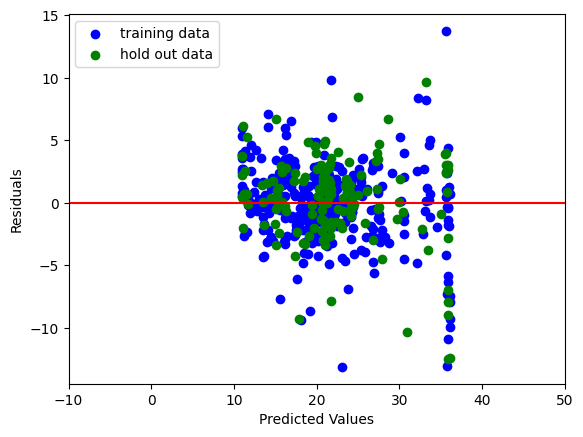

In [117]:
plt.scatter(gs.predict(X_train),gs.predict(X_train)-y_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),gs.predict(X_test)-y_test, c="g", label="hold out data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

In [ ]:
r = tree.export_text(gs.best_estimator_.estimators_[40],feature_names=columns.tolist(), max_depth=3)
print(r)

In [ ]:
sns.barplot(x=columns, y=gs.best_estimator_.feature_importances_, hue=columns, palette="Blues_d")

## Boosting: AdaBoost

Boosting is another ensemble method that combines multiple weak models to create a strong model but in a different manner. It works by sequentially training models that focus on the instances that were previously misclassified by the ensemble. Each model is assigned a weight based on its performance, and these weights are used to adjust the importance of each model's predictions during the combination phase. Boosting tries to learn from the mistakes of the previously trained models to improve upon them, leading to a more accurate final ensemble model.



<div style="float: left; text-align:center; width: 46%">
<figure>
    <img src="figures/adaboost_regression.png" alt="Adaboost"/>
</figure>
</div>

1. Assign equal weights to observations $w_i^{(0)}=1/m$
2. For $k=1,\ldots,K$ 
    - Select a sample of observations based on the weights.  
    - Create the $k$-th weak learner and compute predictions $x^{(k)}$
    - Compute the model \textbf{weighted} error  and assign its coefficient:  $$\alpha^{(k)}=\lambda\times\log((1-error)/error)$$
    - Update sample weights: $$w_i^{(k+1)} \propto w_i^{(k)} \times \exp(-\alpha^{(k)}y_i\hat x_i^{(k)}) $$ 
3. Final weighted prediction  




**Main Parameters**
- `n_estimators`: Number of estimators ($K$) 
- `base_estimator`: Weak estimator type 
- `learning_rate`: weights of estimator in final decision ($\lambda$) 


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# NOTE THE POSSIBILITY TO USE DIFFERENT WEAK LEARNERS!
base1=SVR(kernel='linear')
base2=DecisionTreeRegressor(max_depth=3)

regressor = AdaBoostRegressor()
parameters = {"n_estimators":[10,50], "estimator": [base1,base2], 
              "learning_rate":[0.5,1.0,1.1], "random_state" : [4]}

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3) #with no params it reduces to a CV

gs = gs.fit(X_train,y_train)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs.score(X_test, y_test)

In [ ]:
y_train_pred=gs.predict(X_train)
y_pred=gs.predict(X_test)

In [ ]:
print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("")
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("")
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("")
print("r2 train: ",metrics.r2_score(y_train, gs.predict(X_train)))
print("r2 test: ",metrics.r2_score(y_test, gs.predict(X_test)))

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(gs.predict(X_train),y_train_pred-y_train, c="b", label="training")
plt.scatter(gs.predict(X_test),y_pred-y_test, c="g", label="test")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

In [ ]:
_=sns.barplot(x=columns, y=gs.best_estimator_.feature_importances_, hue=columns, palette="Blues_d")

## Boosting: Gradient Boosting

XGBoost employs a boosting framework, where weak models, are combined to form a strong ensemble. The algorithm iteratively adds new weak model to the ensemble attempting to correct the errors made by the previous trees. During training, XGBoost optimizes an objective function that captures both the training loss and a regularization term to prevent overfitting.

<div style="float: left; text-align:center; width: 55%">
<figure>
    <img src="figures/boosting.png" alt="Neural Network weights"/>
</figure>
</div>

1. Train a weak learner $F_0$ and compute predictions $x^{(k)}$
2. For $k=1,\ldots,K$ 
    - Compute the difference between the target $y$ and the predictions of the current learner
    - $\hat{y}_{k-1} = F_{k-1}(x_i) $              
    - Train a weak learner that minimize the loss function (error)
    - $$f_k =  \arg\min_{f} L_m = \arg\min_{f} \sum_{i=1}^{n} l(y_i, F_{m-1}(x_i) + f(x_i))$$
    - $F_{k} = F_{k-1} + \lambda f_k$

**Main Parameters**
- `n_estimators`: Number of estimators ($K$) 
- `base_estimator`: Weak estimator type 
- `learning_rate`: weights of estimator in final decision ($\lambda$) 


In [121]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor() # base_estimator=DecisionTreeRegressor(max_depth=3)
parameters = {"n_estimators":[10,30,20,50], 
              "learning_rate":[0.1, 0.5,1,2], 
              "random_state" : [0] ,
              "max_depth":[1,2]}

#DEFINE YOUR GRIDSEARCH 
gs = GridSearchCV(regressor, parameters, cv=3) 

gs = gs.fit(X_train,y_train)


#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: 0.835429 using {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50, 'random_state': 0}
0.495441 (0.025217) with: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 10, 'random_state': 0}
0.738271 (0.036014) with: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 30, 'random_state': 0}
0.660730 (0.032531) with: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 20, 'random_state': 0}
0.791441 (0.043970) with: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50, 'random_state': 0}
0.654495 (0.044383) with: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 10, 'random_state': 0}
0.817974 (0.054446) with: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 30, 'random_state': 0}
0.788645 (0.049958) with: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 20, 'random_state': 0}
0.835429 (0.049262) with: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50, 'random_state': 0}
0.749956 (0.053221) with: {'learning_r

0.871753364825068

In [122]:
print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("")
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("")
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("")
print("r2 train: ",metrics.r2_score(y_train, gs.predict(X_train)))
print("r2 test: ",metrics.r2_score(y_test, gs.predict(X_test)))

MAE train:  1.7636893657478308
MAE test:  2.2187742080176545

MSE train:  5.483503615664077
MSE test:  8.279032781848382

RMSE train:  2.3416881977889537
RMSE test:  2.877330843307454

r2 train:  0.9092879869575933
r2 test:  0.871753364825068


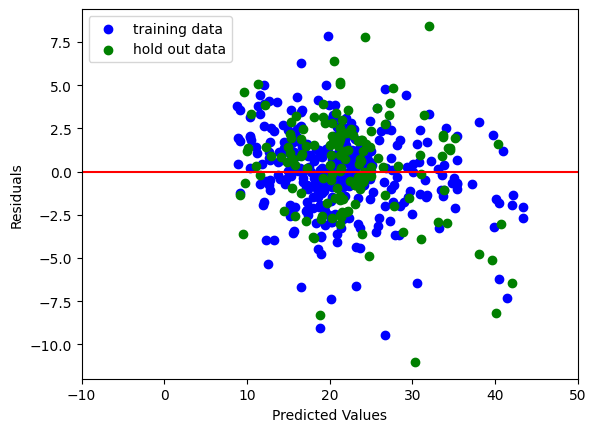

In [123]:
plt.scatter(gs.predict(X_train),gs.predict(X_train)-y_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),gs.predict(X_test)-y_test, c="g", label="hold out data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

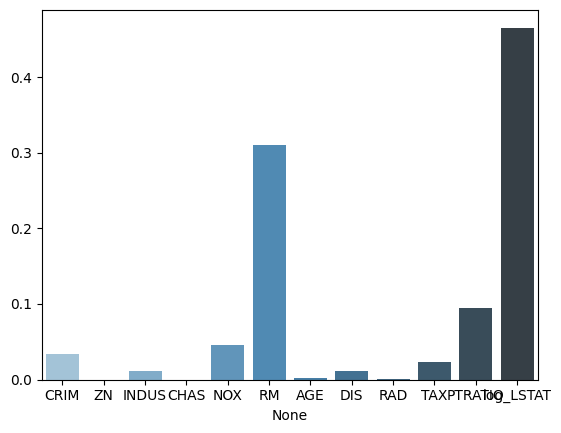

In [124]:
_=sns.barplot(x=columns, y=gs.best_estimator_.feature_importances_, hue=columns, palette="Blues_d")

## Model explainabiliy

## LIME - Local Interpretable Model-agnostic Explanations

LIME is an approach to explain the predictions of any black-box model, irrespective of the underlying algorithm. It provides local explanations by approximating the model's behavior around a specific instance of input data.

LIME works by generating a set of perturbed instances around the data point of interest. These perturbed instances are created by randomly modifying the features while keeping the label fixed. The model's predictions are then evaluated for each perturbed instance to obtain a local understanding of its behavior.

Next, a simpler, interpretable model (e.g., linear regression) is trained on the perturbed instances, using the original model's predictions as the target variable. The interpretable model approximates the black-box model's behavior in the local region around the selected instance.

Finally, the interpretable model can be used to explain the local behavior of the black-box model. It assigns importance weights to the features according to their influence on the predictions. The higher the weight, the more influential the feature is in determining the outcome.


![lime](https://www.oreilly.com/content/wp-content/uploads/sites/2/2019/06/figure4-99d9ea184dd35876e0dbae81f6fce038.jpg)

ref: Marco Tulio Ribeiro, Sameer Singh and Carlos Guestrin. Why Should {I} Trust You?: Explaining the Predictions of Any Classifier. SIGKDD16.

In [125]:
# Install the package in the current Jupyter kernel
#import sys
#!pip install lime
#!{sys.executable} -m pip install lime

In [145]:
import lime
import lime.lime_tabular

In [146]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,log_LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,1.605430
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,2.212660
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,1.393766
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,1.078410
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,1.673351
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,2.269028
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,2.206074
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,1.729884
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,1.868721


In [147]:
# CATEGORICAL: CHAS(3), RAD(8) 
categorical=[3,8]
# feature names
features=list(X.columns)

In [148]:
# Create the explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, 
                                                   feature_names=features, 
                                                   categorical_features=categorical, 
                                                   verbose=True, 
                                                   mode='regression')

In [149]:
# Recall the first values of the houses
y_train[:11]

array([13.1, 26.5, 14.9, 11.7, 17.8, 39.8, 20. , 36.1, 14.6, 22.4, 23.2])

In [150]:
svr = SVR(C=10, epsilon=0.01, gamma='auto', kernel='rbf')
_=svr.fit(X_train, y_train)

In [152]:
i = 0
exp = explainer.explain_instance(X_train[i], svr.predict, num_features=5)

Intercept 23.436330773854298
Prediction_local [21.79940083]
Right: 14.221956277913698


In [153]:
print(f"Real value {y_train[0]}")
exp.show_in_notebook(show_table=True)

Real value 13.1


## SHAP: SHapley Additive exPlanations

SHAP explain predictions of any black-box model by assigning feature importance scores. It is based on the concept of Shapley values from cooperative game theory.

SHAP values provide a way to distribute the prediction value among the features, attributing their contribution to the overall prediction. The idea is to consider all possible coalitions of features and measure their impact on the prediction. 

To compute SHAP values, a reference value (e.g., the average of the training data) is chosen as a starting point. Then, different subsets of features are selected, and their contributions are evaluated by comparing predictions with or without the given feature subset. SHAP values quantify the marginal contribution of each feature to the prediction compared to all possible feature combinations.

$$\phi_j(val)=\sum_{S\subseteq\{x_{1},\ldots,x_{p}\}\setminus\{x_j\}}\frac{|S|!\left(p-|S|-1\right)!}{p!}\left(val\left(S\cup\{x_j\}\right)-val(S)\right)$$

Notice that there are different explainer types depending on the type of model and data:

1. `shap.Explainer` -- default
2. `shap.explainers.Tree` -- ensembles of trees (Decision Tree, Rnadom Forest, XGBoost)
3. `shap.explainers.Deep` --  deep learning models
4. `shap.explainers.Linear` 

In [134]:
import shap  
shap.initjs()

### SHAP - SVR

In [156]:
# rather than use the whole training set to estimate expected values, we summarize with
# a set of weighted kmeans, each weighted by the number of points they represent.
X_train_summary = shap.kmeans(X_train, 10)

In [157]:
explainer = shap.KernelExplainer(svr.predict, X_train_summary, feature_names=features)
shap_values = explainer.shap_values(X_test)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 147/147 [01:09<00:00,  2.11it/s]


In [154]:
print(y_test[:11])

[13.4 34.9 15.3 16.1 16.6 16.5 23.2 23.  29.9 14.1 22.8]


In [159]:
i = 8
shap.force_plot(explainer.expected_value, shap_values[i], X_test[i], feature_names = features)

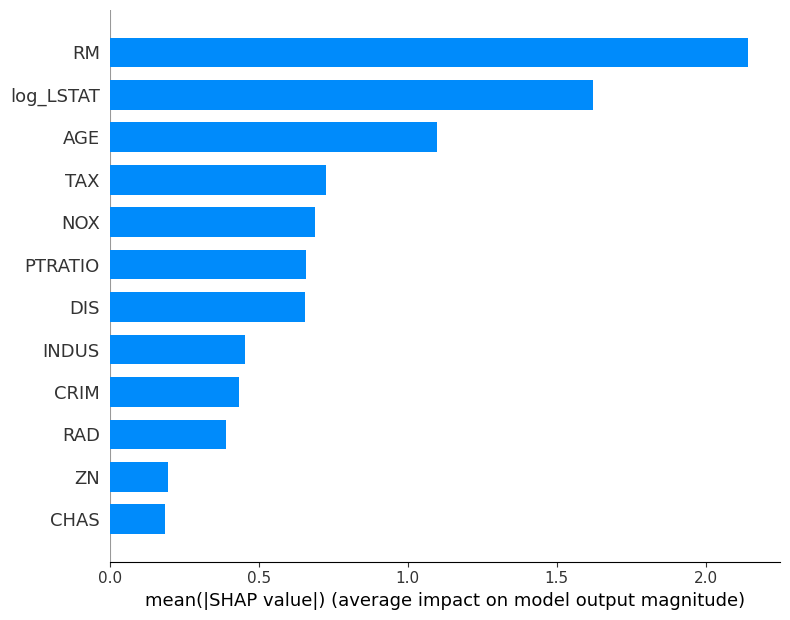

In [138]:
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=features)

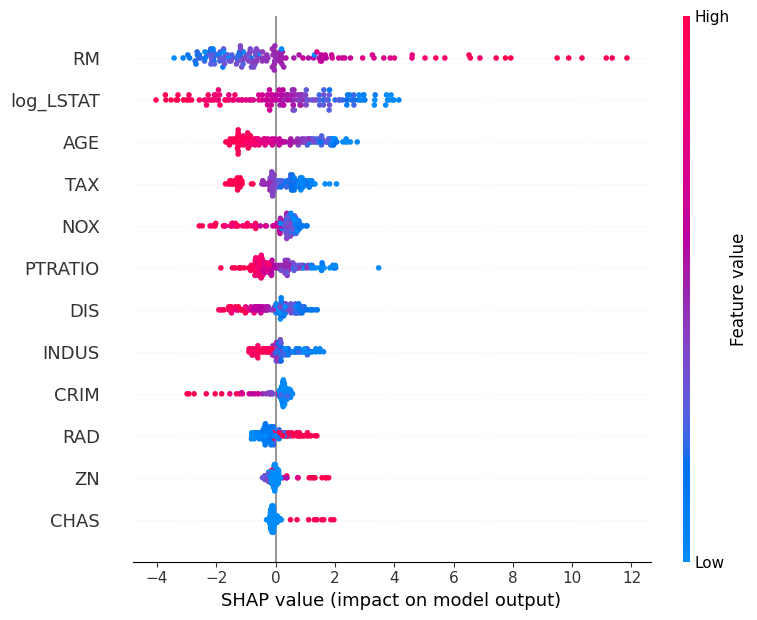

In [139]:
shap.summary_plot(shap_values, X_test, feature_names=features)

In [140]:
shap.force_plot(explainer.expected_value, shap_values, X_test, feature_names=features)

### SHAP Random forest 

In [160]:
rf = RandomForestRegressor(min_samples_leaf=0.05, n_estimators=200)
_=rf.fit(X_train, y_train)

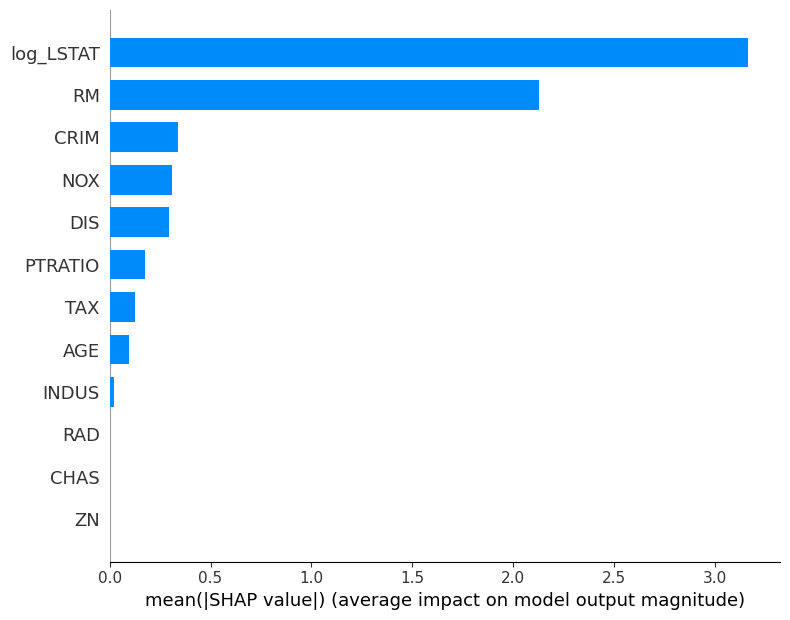

In [161]:
explainer_rf = shap.TreeExplainer(rf, X_train, feature_names=features)
shap_values = explainer_rf.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=features)


In [143]:
i = 0
shap.force_plot(explainer.expected_value, shap_values[i], X_test[i], feature_names = features)

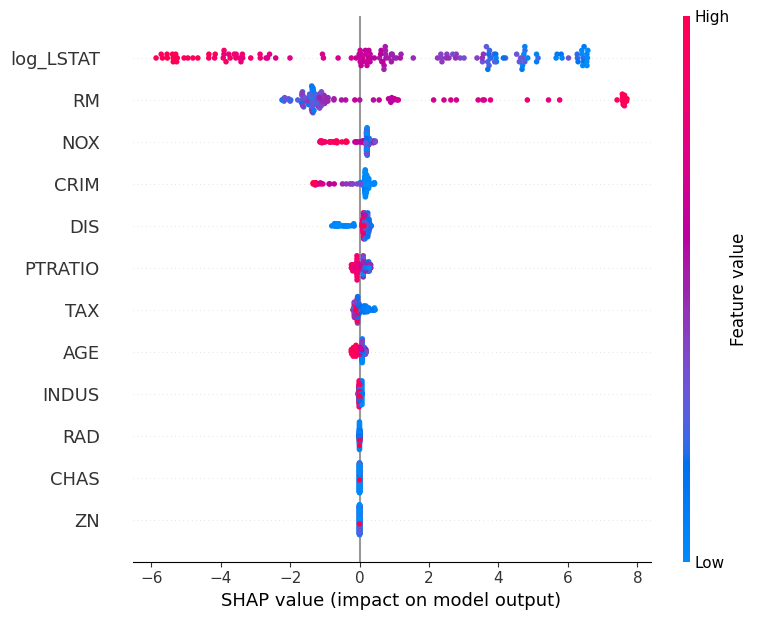

In [144]:
shap.summary_plot(shap_values, X_test, feature_names=features)